In [1]:
%pylab inline
import pynbody
import sphviewer as sph
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sphviewer.tools import QuickView, Blend

Populating the interactive namespace from numpy and matplotlib


VOID S

In [2]:
path='/mnt/is2/dpaz/ITV/S1373/out/'
s=pynbody.load(path+'snapshot_050')

In [3]:
s.families()

[<Family gas>, <Family dm>, <Family star>]

In [4]:
pos = s['pos']#.in_units('Mpc')
xbox=403.8960 
ybox=459.8882
zbox=440.9021 

xc=408.205481 - xbox + 250 
yc=457.777839 - ybox + 250   
zc=441.538681 - zbox + 250

In [5]:
2*27240661

54481322

In [6]:
x = pos[:27240661,0] - xc
y = pos[:27240661,1] - yc 
z = pos[:27240661,2] - zc 

x2 = pos[27240661:57136519,0] - xc
y2 = pos[27240661:57136519,1] - yc 
z2 = pos[27240661:57136519,2] - zc 

x3 = pos[74582453:,0] - xc
y3 = pos[74582453:,1] - xc
z3 = pos[74582453:,2] - xc

In [7]:
mgs = np.ones(len(x))
mdm = np.ones(len(x2))
mst = np.ones(len(x3))

In [8]:
rl=20
gscut, = np.where((x <rl) & (y <rl) & (z <rl) & (x >-rl) & (y >-rl) & (z >-rl))
dmcut, = np.where((x2 <rl) & (y2 <rl) & (z2 <rl) & (x2 >-rl) & (y2 >-rl) & (z2 >-rl))
stcut, = np.where((x3 <rl) & (y3 <rl) & (z3 <rl) & (x3 >-rl) & (y3 >-rl) & (z3 >-rl))

In [9]:
pos_gs=np.zeros([len(gscut),3])
pos_gs[:,0]=x[gscut]
pos_gs[:,1]=y[gscut]
pos_gs[:,2]=z[gscut]

pos_dm=np.zeros([len(dmcut),3])
pos_dm[:,0]=x2[dmcut]
pos_dm[:,1]=y2[dmcut]
pos_dm[:,2]=z2[dmcut]

pos_st=np.zeros([len(stcut),3])
pos_st[:,0]=x3[stcut]
pos_st[:,1]=y3[stcut]
pos_st[:,2]=z3[stcut]

mgs=np.ones(len(gscut))
mdm=np.ones(len(dmcut))
mst=np.ones(len(stcut))

Text(0, 0.5, '$y [Mpc/h]$')

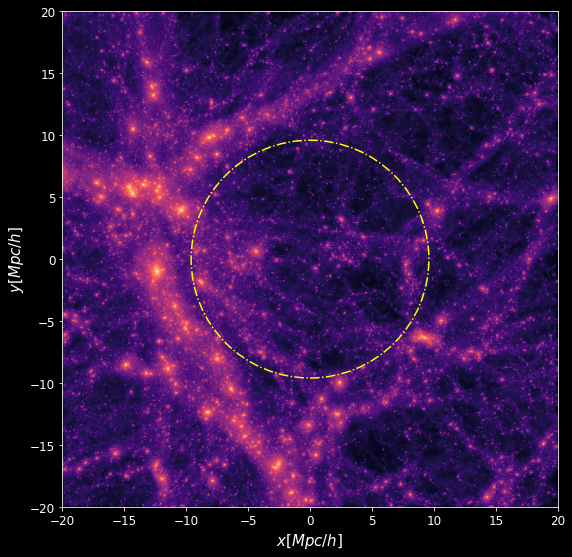

In [10]:
plt.style.use('dark_background')
axis_font = {'fontname':'Arial', 'size':'20'}
matplotlib.rc('xtick', labelsize=12)     
matplotlib.rc('ytick', labelsize=12)

vmin=0
vmax=6
# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='magma'
nb1 = 16 #suaviszado
npixel = 500 #numero de pixeles
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8), sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[2,5]})
fig.subplots_adjust(bottom=0.06, left =0.11, right = 0.97, top = 0.97, wspace=0., hspace= 0)

particles=sph.Particles(pos_dm,mdm,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

ax.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap) #, vmin=vmin, vmax= vmax)
ax.set_xlim(-rl,rl)
ax.set_ylim(-rl,rl)

circ = Circle((0,0),9.6,ls='-.',facecolor='None',edgecolor='yellow',linewidth=1.5)
ax.add_patch(circ)

plt.xlabel(r"$x [Mpc/h]$",size=15)
plt.ylabel(r"$y [Mpc/h]$",size=15)

Text(0, 0.5, '$r [Mpc/h]$')

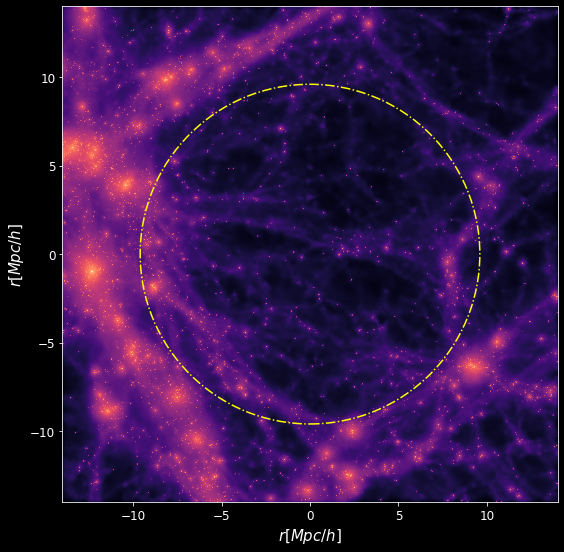

In [68]:
plt.style.use('dark_background')
axis_font = {'fontname':'Arial', 'size':'20'}
matplotlib.rc('xtick', labelsize=12)     
matplotlib.rc('ytick', labelsize=12)

vmin=0
vmax=6
# ----escala de colores que te guste (http://matplotlib.org/examples/color/colormaps_reference.html)---
cmap='magma'
nb1 = 16 #suaviszado
npixel = 500 #numero de pixeles
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8), sharey=True, sharex=True)
#                        gridspec_kw = {'height_ratios':[2,5]})
fig.subplots_adjust(bottom=0.06, left =0.11, right = 0.97, top = 0.97, wspace=0., hspace= 0)

particles=sph.Particles(pos_gs,mgs,nb=nb1)
escena=sph.Scene(particles)
escena.update_camera(r='infinity',x=0,y=0,z=0,extent=[-rl,rl,-rl,rl],xsize=npixel,ysize=npixel)
rend=sph.Render(escena)
extent=escena.get_extent()
rend.set_logscale()

ax.imshow(rend.get_image(),extent=extent,origin='lower',cmap=cmap) #, vmin=vmin, vmax= vmax)
ax.set_xlim(-rl,rl)
ax.set_ylim(-rl,rl)

circ = Circle((0,0),9.6,ls='-.',facecolor='None',edgecolor='yellow',linewidth=1.5)
ax.add_patch(circ)

plt.xlabel(r"$r [Mpc/h]$",size=15)
plt.ylabel(r"$r [Mpc/h]$",size=15)

In [69]:
def get_normalized_image(image, vmin=None, vmax=None):
    if(vmin == None):
        vmin = np.min(image)
    if(vmax == None):
        vmax = np.max(image)

    image = np.clip(image, vmin, vmax)
    image = (image-vmin)/(vmax-vmin)

    return image

In [70]:
def get_normalized_image(image):
        image = (image-np.min(image))/(np.max(image)-np.min(image))
        return image

In [71]:
print('particulas gas',np.shape(pos_gs))
print('particulas dm ',np.shape(pos_dm))
      

particulas gas (2934387, 3)
particulas dm  (3305623, 3)


In [ ]:
pos1=pos_st
pos2=pos_dm
qv1 = QuickView(pos1, np.ones(len(pos1)),
                    r='infinity', logscale=True, plot=False,
                    extent=[-rl,rl,-rl,rl],nb=500)#, x=0, y=0, z=0)
qv2 = QuickView(pos2, np.ones(len(pos2)),
                    r='infinity', logscale=True, plot=False,
                    extent=[-rl,rl,-rl,rl])#, x=0, y=0, z=0)


image1 = cm.inferno(get_normalized_image(qv1.get_image()))
image2 = cm.Greys_r(get_normalized_image(qv2.get_image()))


fig = plt.figure(1, figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
blend = Blend.Blend(image1, image2)
screen  = blend.Screen()
overlay = blend.Overlay()

ax1.imshow(screen, origin='lower', extent=qv1.get_extent())
ax1.set_title('Screen')
ax2.imshow(overlay, origin='lower', extent=qv2.get_extent())
ax2.set_title('Overlay')
plt.show()

In [53]:
np.sum(image1)

250000.0

In [53]:
img_drk=get_normalized_image(img_drk, 0, 1.5)